In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [44]:
import pandas as pd

# Load the full dataset
df = pd.read_csv("fer2013.csv")

# Split into 3 parts (adjust based on size)
chunk_size = len(df) // 3

for i in range(3):
    start = i * chunk_size
    end = (i + 1) * chunk_size if i < 2 else len(df)
    df_chunk = df.iloc[start:end]
    df_chunk.to_csv(f"fer2013_part_{i+1}.csv", index=False)


In [48]:
import pandas as pd

df1 = pd.read_csv("fer2013_part_1.csv")
df2 = pd.read_csv("fer2013_part_2.csv")
df3 = pd.read_csv("fer2013_part_3.csv")

df = pd.concat([df1, df2, df3], ignore_index=True)

print("Full dataset loaded:", df.shape)


Full dataset loaded: (35887, 3)


In [54]:
import numpy as np
import pandas as pd

# Load a small sample of the dataset first
df1 = pd.read_csv('fer2013_part_1.csv')
df2 = pd.read_csv('fer2013_part_2.csv')
df3 = pd.read_csv('fer2013_part_3.csv')
df = pd.concat([df1, df2, df3], ignore_index=True)
print("Full dataset loaded:", df.shape)
# Let's try with a small portion of the dataset to avoid memory overload
small_df = df.head(100)  # Load only the first 100 samples
X = np.array([np.fromstring(image, sep=' ') for image in small_df['pixels'].values])
y = np.array(small_df['emotion'].values)

# Reshape and normalize the images (resize the images to smaller size to save memory if needed)
X = X.reshape(-1, 48, 48, 1).astype('float32') / 255.0  # Resizing to (48, 48)
print(X.shape, y.shape)  # Check the shape of the images and labels

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train and test split done.")


Full dataset loaded: (35887, 3)
(100, 48, 48, 1) (100,)
Train and test split done.


In [4]:
# Import necessary libraries
from tensorflow.keras import models, layers

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(7, activation='softmax')  # 7 emotion classes in FER-2013
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


2025-04-23 06:18:21.401041: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745389102.867812   20824 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745389103.697121   20824 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745389104.709076   20824 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745389104.709112   20824 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745389104.709115   20824 computation_placer.cc:177] computation placer alr

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)


Epoch 1/30


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1406 - loss: 1.9370 - val_accuracy: 0.1250 - val_loss: 1.8932
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2500 - loss: 1.7988 - val_accuracy: 0.1250 - val_loss: 1.9087
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step - accuracy: 0.2656 - loss: 1.7718 - val_accuracy: 0.1250 - val_loss: 1.8002
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step - accuracy: 0.1562 - loss: 1.7936 - val_accuracy: 0.1250 - val_loss: 1.8336
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2656 - loss: 1.7459 - val_accuracy: 0.1250 - val_loss: 1.8947
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2656 - loss: 1.7294 - val_accuracy: 0.2500 - val_loss: 1.8719
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step - accuracy: 0.3750 - loss: 1.7227 - val_accuracy: 0.1250 - val_loss: 1.8418
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step - accuracy: 0.2812 - loss: 1.6873 - val_accuracy: 0.1250 - val_loss: 1.8219
Epoch 9/30
1/1 

Epoch 1/30


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step - accuracy: 0.8750 - loss: 0.4167 - val_accuracy: 0.1875 - val_loss: 2.5129
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step - accuracy: 0.9219 - loss: 0.3493 - val_accuracy: 0.1875 - val_loss: 2.7351
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9375 - loss: 0.3025 - val_accuracy: 0.1250 - val_loss: 2.7592
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step - accuracy: 0.9375 - loss: 0.2530 - val_accuracy: 0.1875 - val_loss: 2.7224
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step - accuracy: 0.9844 - loss: 0.2031 - val_accuracy: 0.1875 - val_loss: 3.0192
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step - accuracy: 0.9844 - loss: 0.1693 - val_accuracy: 0.1875 - val_loss: 3.1140
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step - accuracy: 0.9844 - loss: 0.1235 - val_accuracy: 0.1875 - val_loss: 3.0412
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step - accuracy: 1.0000 - loss: 0.1048 - val_accuracy: 0.1875 - val_loss: 3.0657
Epoch 

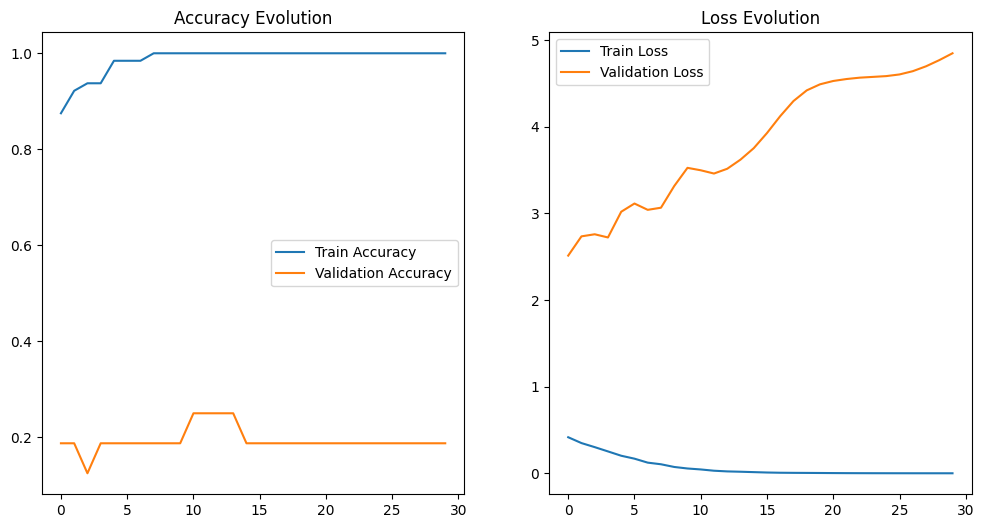

In [9]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result of model.fit()
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

# Plotting accuracy and loss graphs
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')

plt.show()


In [10]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


1/1 - 0s - 57ms/step - accuracy: 0.2500 - loss: 9.3865
Test Loss: 9.386480331420898
Test Accuracy: 0.25


In [11]:
# Predict on a test sample
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compare predictions to actual values (e.g., printing the first 10 predictions)
print("Predictions:", y_pred_labels[:10])
print("Actual values:", y_test[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predictions: [2 6 3 3 0 3 0 3 3 2]
Actual values: [6 6 4 2 6 5 0 3 0 0]


In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np

# 1. Predict on test set
y_pred_probs = model.predict(X_test)  # model should be trained already
y_pred = np.argmax(y_pred_probs, axis=1)  # get predicted class indices

# 2. If y_test is just integers, use it directly
cm = confusion_matrix(y_test, y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


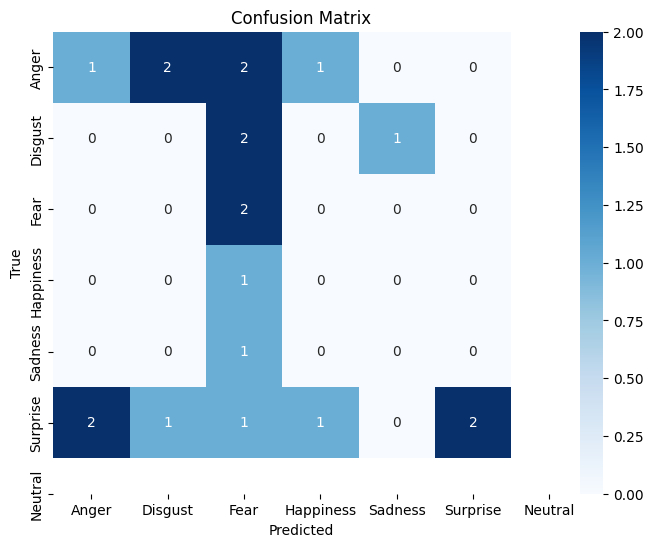

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

emotion_labels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [23]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2500 - loss: 9.3865
Test Loss: 9.386480331420898
Test Accuracy: 0.25


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels (e.g., from probabilities)
y_pred_classes = np.argmax(y_pred, axis=1)

# Show some predictions
for i in range(5):  # Displaying first 5 predictions
    print(f"Predicted: {emotion_labels[y_pred_classes[i]]}, Actual: {emotion_labels[y_test[i]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted: Fear, Actual: Neutral
Predicted: Neutral, Actual: Neutral
Predicted: Surprise, Actual: Sadness
Predicted: Happiness, Actual: Fear
Predicted: Anger, Actual: Neutral


In [ ]:
# Save the model
model.save('emotion_detection_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('emotion_detection_model.h5')

# Evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)
print(f'Test Loss (after loading): {test_loss}')
print(f'Test Accuracy (after loading): {test_accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.1500 - loss: 8.2328
Test Loss (after loading): 8.232823371887207
Test Accuracy (after loading): 0.15000000596046448
